In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Desktop/Matplotlib/data/Mouse_metadata.csv"
study_results_path = "Desktop/Matplotlib/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")


# Display the data table for preview

combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice

total_mouse = len(combined_df["Mouse ID"].unique())
print("Number of Mice :", (total_mouse))

Number of Mice : 249


In [17]:
# Getting the duplicate mice by ID number

duplicate_mouseID = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
print(f"Duplicate Mouse ID: {duplicate_mouseID}")


Duplicate Mouse ID: ['g989']


In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint

dup_mouse_ID_df = combined_df.loc[combined_df["Mouse ID"] == "g989"]
dup_mouse_ID_df




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
# Optional: Get all the data for the duplicate mouse ID 


dup_mouse_ID_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dup_mouse_ID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mouse_ID_df)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice in the clean DataFrame

clean_mouse = clean_df["Mouse ID"].nunique()

clean_mouse

249

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume 

# Mean
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()

# Median
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()

# Variance 
var = clean_df['Tumor Volume (mm3)'].groupby (clean_df['Drug Regimen']).var()

# Standard deviation
std = clean_df['Tumor Volume (mm3)'].groupby (clean_df['Drug Regimen']).std()

# SEM: return unbiased stardard error of mean 
sem = clean_df['Tumor Volume (mm3)'].groupby (clean_df['Drug Regimen']).sem() 

summary_statistics_table = pd.DataFrame({"Mean of Tumor Volume": mean,
                              "Median of Tumor Volume": median,
                              "Variance of Tumor Volume": var,
                              "STD of Tumor Volume" :std, 
                              "SEM of Tumor Volume" :sem})
summary_statistics_table
            






,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# Assemble the resulting series into a single summary dataframe

drugs_total = pd.DataFrame(pd.value_counts(clean_df["Drug Regimen"]))
drugs_total

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,161


In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

clean_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)' : ["median", "mean", "var", "std","sem"]})

Tumor Volume (mm3)                                          
                         median       mean        var       std       sem
Drug Regimen                                                             
Capomulin             41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin              51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol             51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril              53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol              52.509285  54.331565  66.173479  8.134708  0.596466
Placebo               52.288934  54.033581  61.168083  7.821003  0.581331
Propriva              50.854632  52.322552  42.351070  6.507770  0.512884
Ramicane              40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn              52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol             51.818479  53.236507  48.533355  6.966589  0.516398

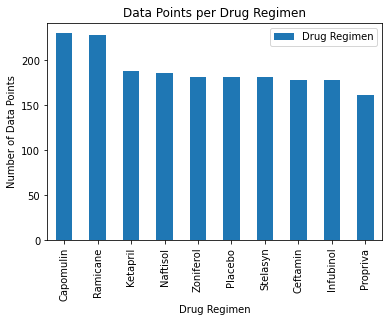

<Figure size 432x288 with 0 Axes>

In [56]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas


drugs_total.plot(kind="bar")
plt.title("Data Points per Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

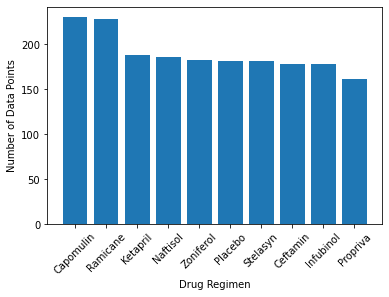

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot

x_axis = combined_df["Drug Regimen"].value_counts().index
y_axis = combined_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()

<AxesSubplot:ylabel='Sex'>

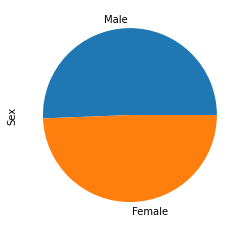

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_total = pd.value_counts(clean_df['Sex'])
gender_total.plot(kind = "pie")



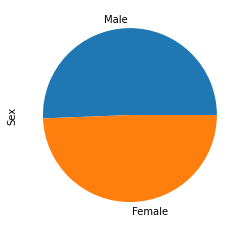

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_total,labels = gender_total.index.values)
plt.ylabel("Sex")

plt.show()

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Determine outliers using upper and lower bounds
    
    
Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
Infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
Ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]
x_axisCa = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisI = Infubinol["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]


quartiles_Ca = x_axisCa.quantile([.25,.5,.75])
lowerq_Ca = quartiles_Ca[0.25]
upperq_Ca = quartiles_Ca[0.75]
iqr_Ca = upperq_Ca-lowerq_Ca
lower_bound_Ca = lowerq_Ca - (1.5*iqr_Ca)
upper_bound_Ca = upperq_Ca + (1.5*iqr_Ca)
print("Drug: Capomulin")
print(quartiles_Ca)
print(lowerq_Ca)
print(upperq_Ca)
print(iqr_Ca)
print(f"Values below {lower_bound_Ca} could be outliers.")
print(f"Values above {upper_bound_Ca} could be outliers.")

quartiles_R = x_axisR.quantile([.25,.5,.75])
lowerq_R = quartiles_R[0.25]
upperq_R = quartiles_R[0.75]
iqr_R = upperq_R-lowerq_R
lower_bound_R = lowerq_R - (1.5*iqr_R)
upper_bound_R = upperq_R + (1.5*iqr_R)
print("Drug: Ramicane")
print(quartiles_R)
print(lowerq_R)
print(upperq_R)
print(iqr_R)
print(f"Values below {lower_bound_R} could be outliers.")
print(f"Values above {upper_bound_R} could be outliers.")

quartiles_I = x_axisI.quantile([.25,.5,.75])
lowerq_I = quartiles_I[0.25]
upperq_I = quartiles_I[0.75]
iqr_I = upperq_I-lowerq_I
lower_bound_I = lowerq_I - (1.5*iqr_I)
upper_bound_I = upperq_I + (1.5*iqr_I)
print("Drug: Infubinol")
print(quartiles_I)
print(lowerq_I)
print(upperq_I)
print(iqr_I)
print(f"Values below {lower_bound_I} could be outliers.")
print(f"Values above {upper_bound_I} could be outliers.")

quartiles_Ce = x_axisCe.quantile([.25,.5,.75])
lowerq_Ce = quartiles_Ce[0.25]
upperq_Ce = quartiles_Ce[0.75]
iqr_Ce = upperq_Ce-lowerq_Ce
lower_bound_Ce = lowerq_Ce - (1.5*iqr_Ce)
upper_bound_Ce = upperq_Ce + (1.5*iqr_Ce)
print("Drug: Ceftamin")
print(quartiles_Ce)
print(lowerq_Ce)
print(upperq_Ce)
print(iqr_Ce)
print(f"Values below {lower_bound_Ce} could be outliers.")
print(f"Values above {upper_bound_Ce} could be outliers.")




Drug: Capomulin
0.25    37.685933
0.50    41.557809
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
37.685932865
45.0
7.314067135000002
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
Drug: Ramicane
0.25    36.674635
0.50    40.673236
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
36.674634585
45.0
8.325365415
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
Drug: Infubinol
0.25    47.312353
0.50    51.820584
0.75    57.314444
Name: Tumor Volume (mm3), dtype: float64
47.3123533
57.314443967500004
10.002090667500006
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
Drug: Ceftamin
0.25    47.208427
0.50    51.776157
0.75    56.801438
Name: Tumor Volume (mm3), dtype: float64
47.2084271125
56.801437570000004
9.593010457500007
Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outlier

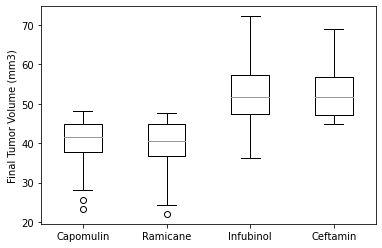

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisCa, x_axisR, x_axisI, x_axisCe])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

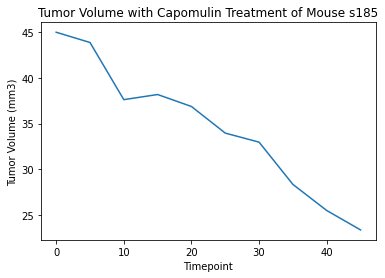

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis = combined_df.loc[combined_df["Mouse ID"] == "s185"]
x_axis = x_axis["Timepoint"]
y_axis = combined_df.loc[combined_df["Mouse ID"] == "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

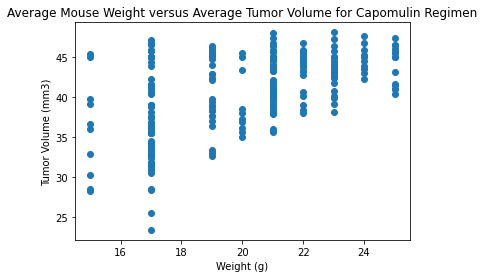

In [71]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_weight_capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_weight_capomulin
mouse_weight = mouse_weight_capomulin["Weight (g)"]
tumor_volume = mouse_weight_capomulin["Tumor Volume (mm3)"]

plt.scatter(mouse_weight, tumor_volume)
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

The correlation between both weight and tumor volume is 0.53


Text(0, 0.5, 'Tumor Volume (mm3)')

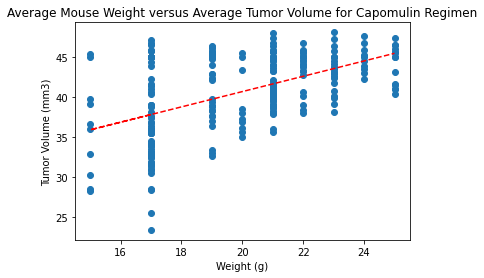

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between both weight and tumor volume is {round(correlation[0],2)}")

slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + int
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, fit, "--", color="r")
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")